# Analyse de l'incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
data_file = "syndrome-varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [4]:
raw_data = pd.read_csv(data_file, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202332          7   9360     2148   16572      14           3   
1     202331          7   3335     1405    5265       5           2   
2     202330          7   5821     3269    8373       9           5   
3     202329          7  13558     8297   18819      20          12   
4     202328          7   6700     4043    9357      10           6   
5     202327          7   7253     4599    9907      11           7   
6     202326          7   9192     6223   12161      14          10   
7     202325          7  11498     8257   14739      17          12   
8     202324          7  11115     7968   14262      17          12   
9     202323          7  12563     6134   18992      19           9   
10    202322          7  12184     8125   16243      18          12   
11    202321          7  11349     7598   15100      17          11   
12    202320          7   9000     4615   13385      14           7   
13    202319          7   9344     6091   12597      14           9   
14    202318          7  10671     7291   14051      16          11   
15    202317          7   9184     6162   12206      14           9   
16    202316          7  11387     8014   14760      17          12   
17    202315          7  14040     7613   20467      21          11   
18    202314          7  15247    11032   19462      23          17   
19    202313          7  13322     9700   16944      20          15   
20    202312          7  10374     7218   13530      16          11   
21    202311          7   4919     2880    6958       7           4   
22    202310          7   4854     2731    6977       7           4   
23    202309          7   7004     4548    9460      11           7   
24    202308          7   8175     5316   11034      12           8   
25    202307          7   6595     3782    9408      10           6   
26    202306          7   9595     6017   13173      14           9   
27    202305          7   6237     3907    8567       9           5   
28    202304          7   6299     3973    8625       9           6   
29    202303          7   6063     3798    8328       9           6   
...      ...        ...    ...      ...     ...     ...         ...   
1676  199126          7  17608    11304   23912      31          20   
1677  199125          7  16169    10700   21638      28          18   
1678  199124          7  16171    10071   22271      28          17   
1679  199123          7  11947     7671   16223      21          13   
1680  199122          7  15452     9953   20951      27          17   
1681  199121          7  14903     8975   20831      26          16   
1682  199120          7  19053    12742   25364      34          23   
1683  199119          7  16739    11246   22232      29          19   
1684  199118          7  21385    13882   28888      38          25   
1685  199117          7  13462     8877   18047      24          16   
1686  199116          7  14857    10068   19646      26          18   
1687  199115          7  13975     9781   18169      25          18   
1688  199114          7  12265     7684   16846      22          14   
1689  199113          7   9567     6041   13093      17          11   
1690  199112          7  10864     7331   14397      19          13   
1691  199111          7  15574    11184   19964      27          19   
1692  199110          7  16643    11372   21914      29          20   
1693  199109          7  13741     8780   18702      24          15   
1694  199108          7  13289     8813   17765      23          15   
1695  199107          7  12337     8077   16597      22          15   
1696  199106          7  10877     7013   14741      19          12   
1697  199105          7  10442     6544   14340      18          11   
1698  199104          7   7913     4563   11263      14           8   
1699  199103          7  15387    10484   20290      27          18   
1700  199102          7  16277  

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [6]:
data = raw_data.copy()

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [8]:
 sorted_data = data.set_index('period').sort_index()

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

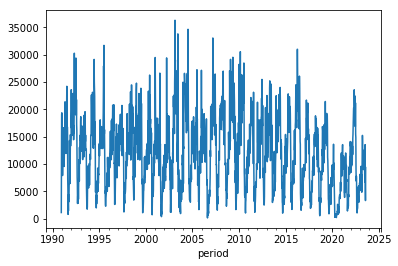

In [10]:
sorted_data['inc'].plot()

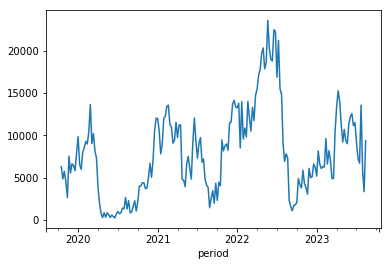

In [11]:
sorted_data['inc'][-200:].plot()

In [12]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

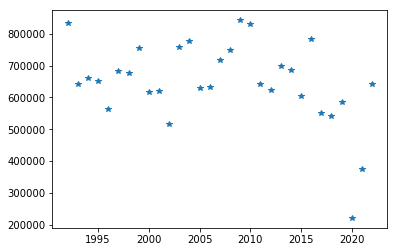

In [14]:
yearly_incidence.plot(style='*')

In [15]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64